# model_GS_LGBM

#### Grid_Search
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter  
https://www.codexa.net/hyperparameter-tuning-python/

In [1]:
# !jupyter nbconvert --to python model_GS_LGBM.ipynb

[NbConvertApp] Converting notebook model_GS_LGBM.ipynb to python
[NbConvertApp] Writing 2837 bytes to model_GS_LGBM.py


In [20]:
# warningの無視
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import f1_score

%matplotlib inline

In [22]:
def importances(model):
    """ 変数重要度
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.barh(range(len(indices)), importances[indices] , align='center')
    plt.yticks(range(len(indices)), feature_X[indices])
    plt.title('decision tree feature importance')
    plt.xlabel('feature importance')
    plt.ylabel('variable')
    plt.show()

#### ========================

In [23]:
path = "../data/models/"
modelName= "model_GS_LGBM"

#### ========================

In [24]:
train_X=pd.read_pickle('../data/feature/train_X.pickle')
valid_X=pd.read_pickle('../data/feature/valid_X.pickle')
test_X=pd.read_pickle('../data/feature/test_X.pickle')

train_y=pd.read_pickle('../data/feature/train_y.pickle')
valid_y=pd.read_pickle('../data/feature/valid_y.pickle')
test_y=pd.read_pickle('../data/feature/test_y.pickle')

In [25]:
test_X.shape

(51096, 149)

In [26]:
test_y.shape

(51096,)

In [27]:
"""ハイパーパラメータの max_depth(木の深さ), 
# n_estimators(決定木の数)に関してグリッドサーチを行う
# グリッドサーチに使用するパラメータの値を用意
"""
seed=1
params = {
    'max_depth': [10, 20, 30, 50],
    'n_estimators': [10, 100, 1000]}

#### ========================

In [28]:
model=lgb.LGBMClassifier(random_state=seed)

#### ========================

In [29]:
grid = GridSearchCV(estimator=model,
    param_grid=params,
    n_jobs=1,
    cv=KFold(5,shuffle=True, random_state=seed),
    scoring='f1',
    verbose=3,
    return_train_score=True)

In [30]:
grid.fit(train_X,  train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 1/5] END ..................max_depth=10, n_estimators=10; total time=   0.8s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 2/5] END ..................max_depth=10, n_estimators=10; total time=   0.8s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 3/5] END ..................max_depth=10, n_estimators=10; total time=   0.8s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[CV 4/5] END ..................max_depth=10, n_estimators=10; total time=   0.8s
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_de

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LGBMClassifier(random_state=1), n_jobs=1,
             param_grid={'max_depth': [10, 20, 30, 50],
                         'n_estimators': [10, 100, 1000]},
             return_train_score=True, scoring='f1', verbose=3)

In [31]:
print(grid.best_estimator_)

LGBMClassifier(max_depth=30, n_estimators=1000, random_state=1)


In [32]:
# 最適解でモデルを作成
model = grid.best_estimator_

In [33]:
# モデルの保存
with open(path + modelName + '.pickle', mode='wb') as f:
    pickle.dump(model, f)

#### ========================

In [34]:
pred=model.predict(valid_X)
# pred=model.predict(test_X)

In [35]:
print(f1_score(valid_y, pred))
# print(f1_score(test_y, pred))

0.8681903569192235


#### ========================

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

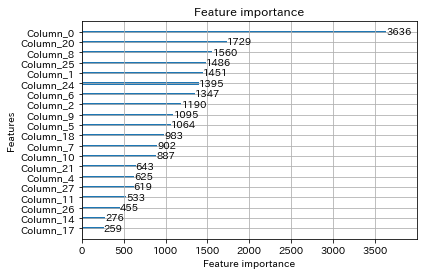

In [36]:
lgb.plot_importance(model,max_num_features=20)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

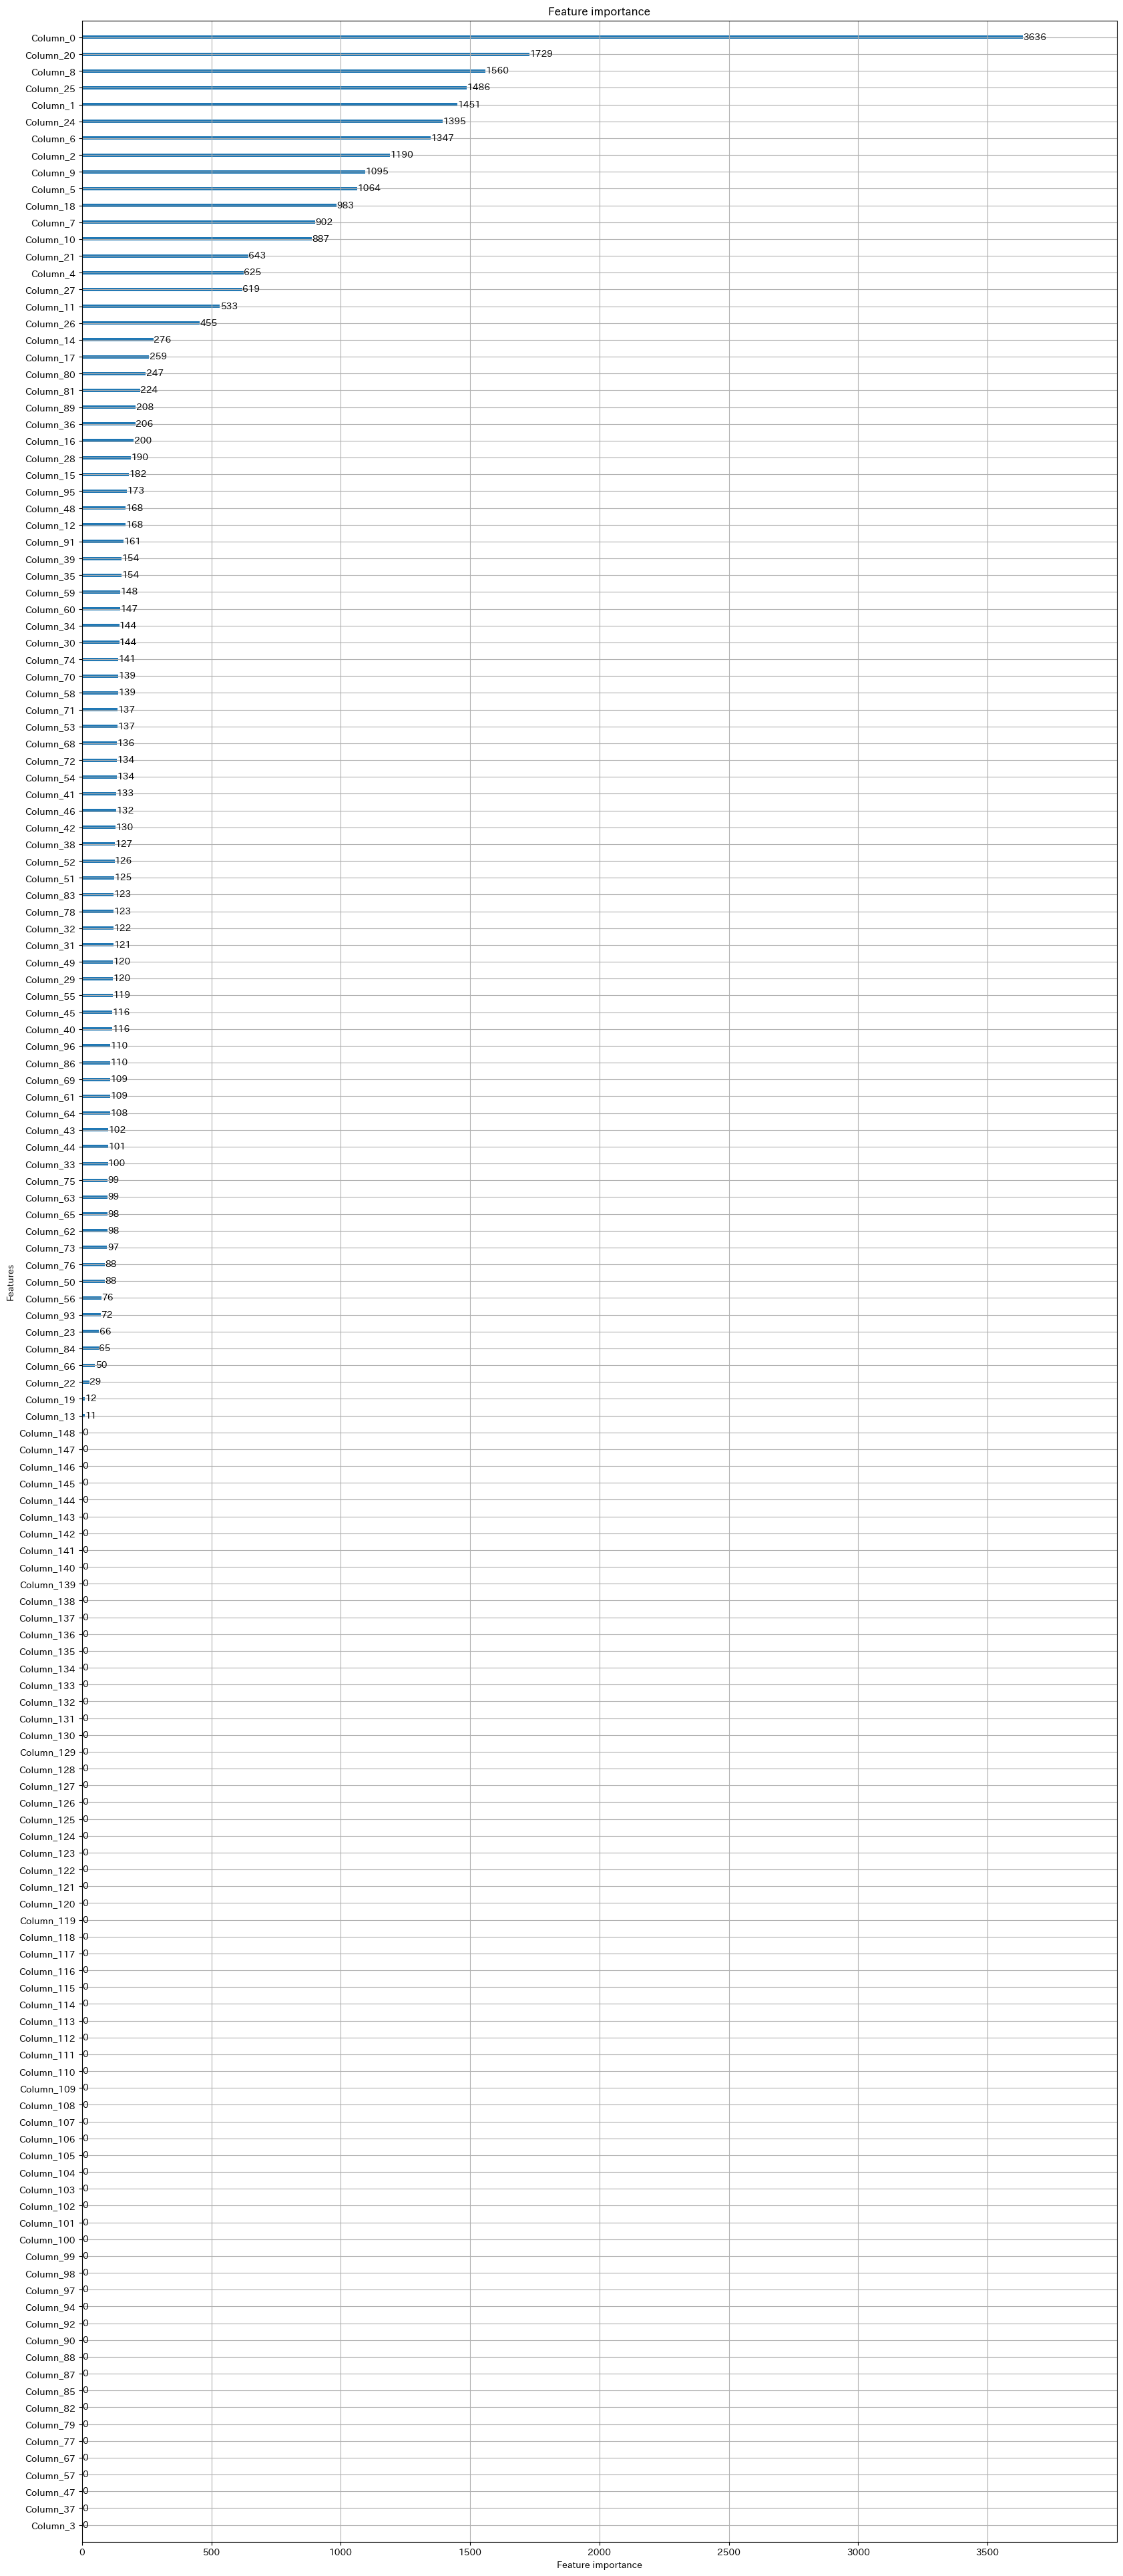

In [37]:
lgb.plot_importance(model,dpi=100,figsize=(20,50),ignore_zero=False)

#### ========================